In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [112]:
filename = 'Cleaned.csv'
df = pd.read_csv(filename, delimiter=";")

In [113]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,QGender,...,SelfExpITAR_C,WantITAR_C,SatAmJap_C,AgreeAmJap_C,SelfExpAmJap_C,WantAmJap_C,SatUmpire_C,AgreeUmpire_C,SelfExpUmpire_C,WantUmpire_C
0,2024-04-03 10:02,2024-04-03 10:19,IP Address,82.69.35.63,100,1035,True,2024-04-03 10:19,R_63Q6UMlzFuUuIKt,Female,...,It does mention computer science but it could ...,NaN,5.0,"Yes, I agree it is politics","The texts mentions economics many times, as we...",NaN,5.0,"Yes, I agree it is leisure",The text talks about the rules of a sports game,NaN
1,2024-04-03 10:10,2024-04-03 10:22,IP Address,86.152.242.253,100,715,True,2024-04-03 10:22,R_8pmnG458WBxHVoR,Female,...,It is discussing legal classifications so it l...,NaN,4.0,"Yes, I agree it is politics",The text focuses soleley on economics which ar...,NaN,4.0,"Yes, I agree it is leisure",While this could be science as it discusses th...,NaN
2,2024-04-03 10:10,2024-04-03 10:22,IP Address,51.191.198.225,100,744,True,2024-04-03 10:22,R_50G9yZe189JktWH,Female,...,I feel this is politics as it is talking about...,NaN,4.0,"Yes, I agree it is politics",I agree this is a survey regarding political v...,NaN,5.0,"Yes, I agree it is leisure",Yes - the text is talking about sporting rules...,NaN
3,2024-04-03 10:01,2024-04-03 10:26,IP Address,149.34.176.78,100,1498,True,2024-04-03 10:26,R_1rrvIuzCL4rBt0g,Female,...,"Again, this text is very dense and hard to dec...",NaN,5.0,"Yes, I agree it is politics",Yes this is definitely politics. It is talking...,NaN,4.0,"Yes, I agree it is leisure",The word umpire says it all - definitleu leisu...,NaN
4,2024-04-03 10:10,2024-04-03 10:26,IP Address,5.66.2.157,100,933,True,2024-04-03 10:26,R_2wWiXcTkAoLBZIt,Male,...,"I understand why the AI has made its decision,...",NaN,3.0,"Yes, I agree it is politics","I am uncertain as is the AI Bot, this could be...",NaN,4.0,"Yes, I agree it is leisure",The text is discussing baseball,NaN


# Population level Demographics & Completion time

In [114]:
# Time spent

# Convert the "Duration (in seconds)" column to numeric, coerce errors
df['Duration (in seconds)'] = pd.to_numeric(df['Duration (in seconds)'], errors='coerce')


# Convert the "Duration (in seconds)" column to minutes
df['Duration (in minutes)'] = df['Duration (in seconds)'] / 60

# Calculate the average duration in minutes
avg_duration_minutes = df['Duration (in minutes)'].mean()

# Calculate the standard deviation of the duration in minutes
sd_duration_minutes = df['Duration (in minutes)'].std()



avg_age = df['QAge'].mean()
sd_age = df['QAge'].std()


print(f"Average Duration: {avg_duration_minutes} minutes")
print(f"Standard Deviation of Duration: {sd_duration_minutes} minutes")
print('  ')
print(f"Average Age: {avg_age}")
print(f"Standard Deviation Age: {sd_age}")


Average Duration: 28.271099290780146 minutes
Standard Deviation of Duration: 14.45515134234014 minutes
  
Average Age: 38.36702127659574
Standard Deviation Age: 12.63296670478676


In [115]:
# Counting the number of participants in each group
participants_gender = df['QGender'].value_counts()

# Sorting the index to ensure the groups are displayed in order
participants_gender = participants_gender.sort_index()

# Display the counts
print(participants_gender)

QGender
Female                       91
Male                         93
Non-binary / third gender     3
Prefer not to say             1
Name: count, dtype: int64


In [116]:
# Filtering "Sat" columns
qsat_columns = [col for col in df.columns if col.startswith('Sat')]

# Calculating mean and standard deviation for "QSat" columns
stats = pd.DataFrame(index=qsat_columns, columns=['Mean','Median','Standard Deviation'])
for col in qsat_columns:
    stats.loc[col, 'Mean'] = df[col].mean()
    stats.loc[col, 'Median'] = df[col].median()
    stats.loc[col, 'Standard Deviation'] = df[col].std()

stats

,Mean,Median,Standard Deviation
SatCarTax_I,4.415493,5.0,0.774074
SatAEC_I,4.295775,4.5,0.873476
SatAssoPpl_I,3.387324,4.0,1.236838
SatBattery_I,1.929577,2.0,1.035867
SatAmCult_I,3.704225,4.0,1.009099
SatCool_I,3.112676,3.0,1.085681
SatChip_C,4.450704,5.0,0.871759
SatConsp_C,4.084507,4.0,0.8033
SatBike_C,3.971831,4.0,0.850062
SatITAR_C,2.478873,2.0,1.207061


# Group Level

In [117]:
# Counting the number of participants in each group
participants_per_group = df['Condition'].value_counts()

# Sorting the index to ensure the groups are displayed in order
participants_per_group = participants_per_group.sort_index()

# Display the counts
print(participants_per_group)


Condition
1    45
2    48
3    49
4    46
Name: count, dtype: int64


In [118]:
# Convert the "Duration (in seconds)" column to minutes for demonstration purposes
df['Duration (in minutes)'] = df['Duration (in seconds)'] / 60

# Group by 'Group' and calculate the mean and standard deviation of the duration in minutes for each group
group_level_duration_stats = df.groupby('Condition')['Duration (in minutes)'].agg(['mean', 'std']).rename(columns={'mean': 'Average Duration (minutes)', 'std': 'Standard Deviation (minutes)'})

group_level_duration_stats

,Average Duration (minutes),Standard Deviation (minutes)
Condition,,
1,27.812222,16.957807
2,29.195486,16.053284
3,29.678571,13.522157
4,26.256159,10.747221


## Satisfaction (group)

In [119]:
# Grouping the DataFrame by 'Group' and calculating mean and standard deviation for each group
condition_4_excluded_= df[df['Condition'] != 4]


grouped_stats = condition_4_excluded_.groupby('Condition')[qsat_columns].agg(['mean', 'std']).rename(columns={'mean': 'Mean', 'std': 'Standard Deviation'})

grouped_stats

SatCarTax_I                     SatAEC_I                     \
                 Mean Standard Deviation      Mean Standard Deviation   
Condition                                                               
1            4.644444           0.484090  4.177778           0.960324   
2            4.250000           0.862949  4.458333           0.742576   
3            4.367347           0.858630  4.244898           0.902095   

          SatAssoPpl_I                    SatBattery_I                     \
                  Mean Standard Deviation         Mean Standard Deviation   
Condition                                                                   
1             3.577778           1.233784     1.777778           0.926599   
2             3.375000           1.231242     2.041667           1.184264   
3             3.224490           1.246082     1.959184           0.978076   

          SatAmCult_I                     ... SatConsp_C                     \
                 Mean Standard Deviation  ...       Mean Standard Deviation   
Condition                                 ...                                 
1            3.866667           0.786245  ...   4.044444           0.824499   
2            3.875000           0.981206  ...   4.145833           0.771558   
3            3.387755           1.151382  ...   4.061224           0.826845   

          SatBike_C                    SatITAR_C                     \
               Mean Standard Deviation      Mean Standard Deviation   
Condition                                                             
1          3.955556           0.851618  2.200000           1.217300   
2          4.000000           0.945313  2.604167           1.233221   
3          3.959184           0.762648  2.612245           1.151382   

          SatAmJap_C                    SatUmpire_C                     
                Mean Standard Deviation        Mean Standard Deviation  
Condition                                                               
1           4.266667           0.719848    3.577778           1.137958  
2           4.270833           0.764633    3.354167           1.279787  
3           3.836735           0.850170    3.714286           0.957427  

[3 rows x 24 columns]

In [120]:
# Melting the DataFrame to long format for "QSat" questions
qsat_long_df = condition_4_excluded_.melt(id_vars=['Condition'], value_vars=qsat_columns, var_name='Question', value_name='Rating')

# Calculating aggregated mean and standard deviation for "QSat" ratings within each group
aggregated_group_stats = qsat_long_df.groupby('Condition')['Rating'].agg(['mean','median', 'std']).rename(columns={'mean': 'Satisfaction Mean', 'median': 'Median', 'std': 'Standard Deviation'})

aggregated_group_stats

,Satisfaction Mean,Median,Standard Deviation
Condition,,,
1,3.618519,4.0,1.267120
2,3.670139,4.0,1.250618
3,3.586735,4.0,1.205168


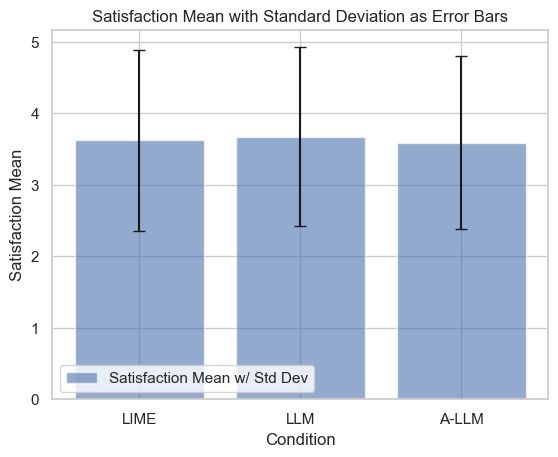

In [121]:
# Plotting
# Plotting with Standard Deviation as error bars
fig, ax = plt.subplots()

# Error bars for standard deviation
ax.bar(aggregated_group_stats.index, aggregated_group_stats['Satisfaction Mean'], yerr=aggregated_group_stats['Standard Deviation'], capsize=4, alpha=0.6, label='Satisfaction Mean w/ Std Dev')

ax.set_xlabel('Condition')
ax.set_ylabel('Satisfaction Mean')
ax.set_title('Satisfaction Mean with Standard Deviation as Error Bars')

plt.xticks(aggregated_group_stats.index, ['LIME', 'LLM', 'A-LLM'])  # Ensure we have ticks for each condition
plt.legend()

plt.show()


In [122]:
# Categorize questions based on ending with 'C' (Correct) or 'I' (Incorrect)
qsat_long_df['Question Type'] = qsat_long_df['Question'].apply(lambda x: 'Correct' if x.endswith('C') else 'Incorrect')

# Grouping by both 'Group' and 'Question Type'
grouped_by_type_stats = qsat_long_df.groupby(['Condition', 'Question Type'])['Rating'].agg(['mean', 'median', 'std']).rename(columns={'mean': 'Satisfaction Mean', 'median': 'Median', 'std': 'Standard Deviation'})

grouped_by_type_stats

Satisfaction Mean  Median  Standard Deviation
Condition Question Type                                               
1         Correct                 3.714815     4.0            1.214902
          Incorrect               3.522222     4.0            1.312461
2         Correct                 3.822917     4.0            1.168651
          Incorrect               3.517361     4.0            1.311851
3         Correct                 3.785714     4.0            1.066876
          Incorrect               3.387755     4.0            1.300821

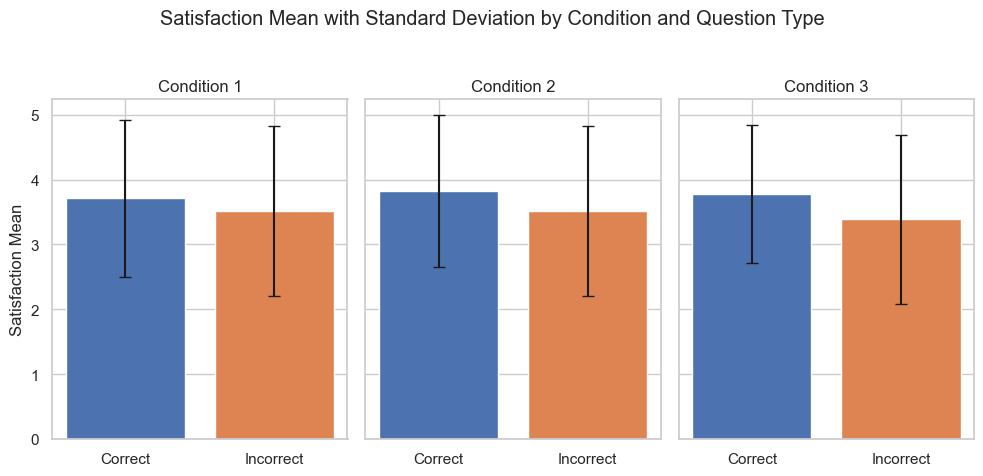

In [123]:
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

for (condition, question_type), group in grouped_by_type_stats.groupby(level=[0, 1]):
    ax = axs[condition - 1]  # Assuming Condition values are 1-indexed and match subplot positions
    ax.bar(question_type, group['Satisfaction Mean'], yerr=group['Standard Deviation'], capsize=4)
    # Set x-tick labels if not already set
    if not ax.get_xticklabels():
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Correct', 'Incorrect'])
    ax.set_title(f'Condition {condition}')
    if ax is axs[0]:  # Only add y-label to the first subplot
        ax.set_ylabel('Satisfaction Mean')

plt.suptitle('Satisfaction Mean with Standard Deviation by Condition and Question Type')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the global title

plt.show()

In [124]:
# First, let's make sure we identify the agreement columns correctly
agree_columns = [col for col in condition_4_excluded_.columns if col.startswith('Agree')]
sat_columns = [col for col in condition_4_excluded_.columns if col.startswith('Sat') ]

# Now, let's reconstruct the analysis DataFrame more accurately
analysis_df = pd.DataFrame()

for sat_col in sat_columns:
    # Deriving the corresponding "Agree" column for the satisfaction score column
    agree_col = 'Agree' + sat_col[3:]
    if agree_col in agree_columns:
        temp_df = condition_4_excluded_[['Condition', sat_col, agree_col]].copy()
        temp_df['Question'] = sat_col[:-2]  # Extracting question identifier from column name, excluding suffix
        temp_df['Agreement'] = temp_df[agree_col].apply(lambda x: 'Agreed' if x.startswith("Yes") else 'Disagreed')        
        temp_df.rename(columns={sat_col: 'Rating'}, inplace=True)
        temp_df.drop(columns=[agree_col], inplace=True)
        analysis_df = pd.concat([analysis_df, temp_df], ignore_index=True)

# Correctly grouping by Condition and Agreement for aggregated stats now
grouped_stats = analysis_df.groupby(['Condition', 'Agreement'])['Rating'].agg(['mean', 'std','median']).reset_index()

# Display the rows of the aggregated stats to ensure correct grouping and calculation
grouped_stats

,Condition,Agreement,mean,std,median
0,1,Agreed,4.160000,0.834350,4.0
1,1,Disagreed,2.071429,0.986549,2.0
2,2,Agreed,4.175904,0.882135,4.0
3,2,Disagreed,2.366460,1.110684,2.0
4,3,Agreed,4.079903,0.887293,4.0
5,3,Disagreed,2.422857,1.046913,2.0


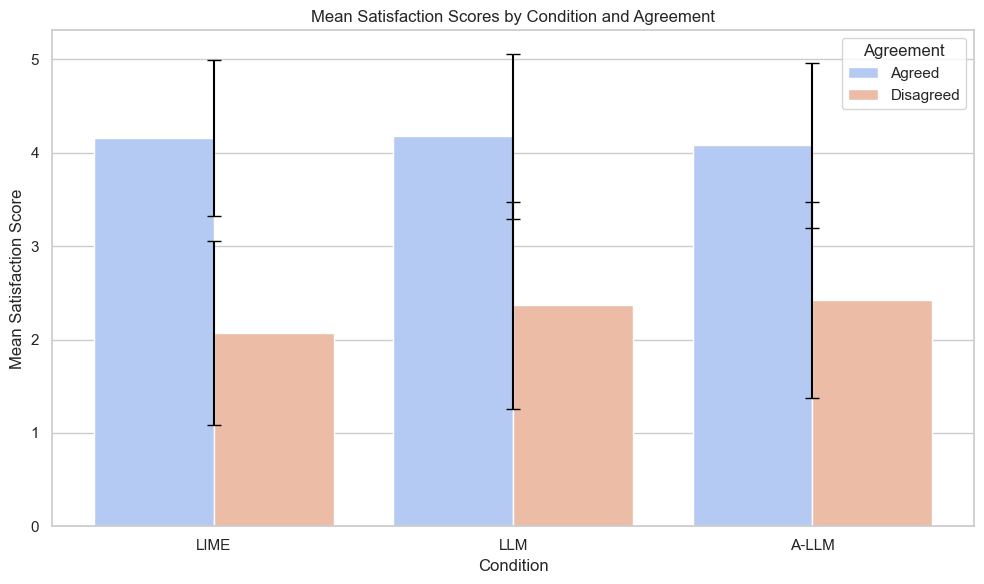

In [125]:
# Setting the plot style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Condition', y='mean', hue='Agreement', data=grouped_stats, palette='coolwarm', errorbar=None)

# Adding error bars manually for standard deviation
for index, row in grouped_stats.iterrows():
    plt.errorbar(x=index//2, y=row['mean'], yerr=row['std'], fmt='none', c='black', capsize=5)

plt.title('Mean Satisfaction Scores by Condition and Agreement')
plt.xlabel('Condition')
plt.ylabel('Mean Satisfaction Score')
plt.xticks(range(3), ['LIME', 'LLM', 'A-LLM'])
plt.legend(title='Agreement')

plt.tight_layout()
plt.show()


# Conviction

In [126]:
# Extracting columns that start with "Agree"
agree_columns = [col for col in df.columns if col.startswith('Agree')]
agree_data = df[agree_columns]

# Descriptive statistics for "Agree" questions
agree_descriptive_stats = agree_data.describe()
agree_descriptive_stats


,AgreeCarTax_I,AgreeAEC_I,AgreeAssoPpl_I,AgreeBattery_I,AgreeAmCult_I,AgreeCool_I,AgreeChip_C,AgreeConsp_C,AgreeBike_C,AgreeITAR_C,AgreeAmJap_C,AgreeUmpire_C
count,188,188,188,188,188,188,188,188,188,188,188,188
unique,3,2,3,2,3,3,2,3,3,2,3,2
top,"Yes, I agree it is politics","Yes, I agree it is science","Yes, I agree it is leisure","No, it is science","Yes, I agree it is politics","Yes, I agree it is science","Yes, I agree it is science","Yes, I agree it is politics","Yes, I agree it is leisure","No, it is politics","Yes, I agree it is politics","Yes, I agree it is leisure"
freq,179,166,125,183,173,106,181,181,174,159,179,155


In [127]:
# Applying the conversion
for col in agree_columns:
        # Mapping "Yes, I agree" to 1, and any "No" response to 0

        df[col] = df[col].apply(lambda x: "Agree" if "Yes, I agree" in x else "Disagree")

In [128]:
# Now, we'll summarize the average agreement level for each "Agree" question
agreement_levels = df[agree_columns]
agreement_levels = agreement_levels.merge(df["Condition"], left_index=True, right_index=True, how='left')


In [129]:
long_df = agreement_levels.melt(id_vars='Condition', value_vars=[col for col in agreement_levels.columns if col != 'Condition'], var_name='Question', value_name='Agreement')

counts = long_df.groupby(['Condition', 'Agreement']).size().unstack(fill_value=0)

counts




Agreement,Agree,Disagree
Condition,,
1,400,140
2,415,161
3,413,175
4,425,127


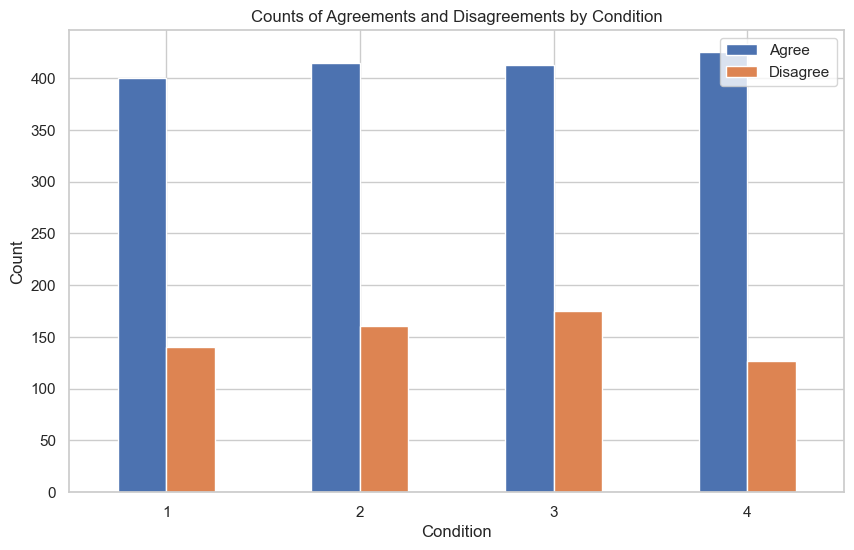

In [130]:
counts.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Agreements and Disagreements by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Agree','Disagree'])
plt.show()


In [131]:
long_df = agreement_levels.melt(id_vars='Condition', var_name='Question', value_name='Response')
long_df['Question Type'] = long_df['Question'].apply(lambda x: 'Correct Classification' if x.endswith('_C') else 'Incorrect Classification')
response_counts = long_df.groupby(['Condition','Question Type', 'Response']).size().reset_index(name='Counts')
response_counts = response_counts.reset_index(drop=True)
response_counts

,Condition,Question Type,Response,Counts
0,1,Correct Classification,Agree,213
1,1,Correct Classification,Disagree,57
2,1,Incorrect Classification,Agree,187
3,1,Incorrect Classification,Disagree,83
4,2,Correct Classification,Agree,229
5,2,Correct Classification,Disagree,59
6,2,Incorrect Classification,Agree,186
7,2,Incorrect Classification,Disagree,102
8,3,Correct Classification,Agree,235
9,3,Correct Classification,Disagree,59


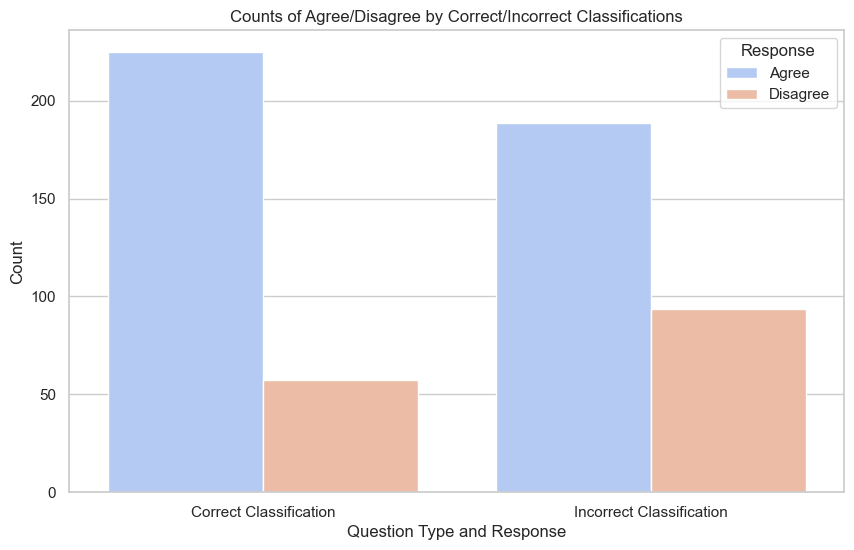

In [98]:
# Use seaborn to plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Question Type', y='Counts', hue='Response', data=response_counts, palette='coolwarm', errorbar=None)

plt.title('Counts of Agree/Disagree by Correct/Incorrect Classifications')
plt.xlabel('Question Type and Response')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

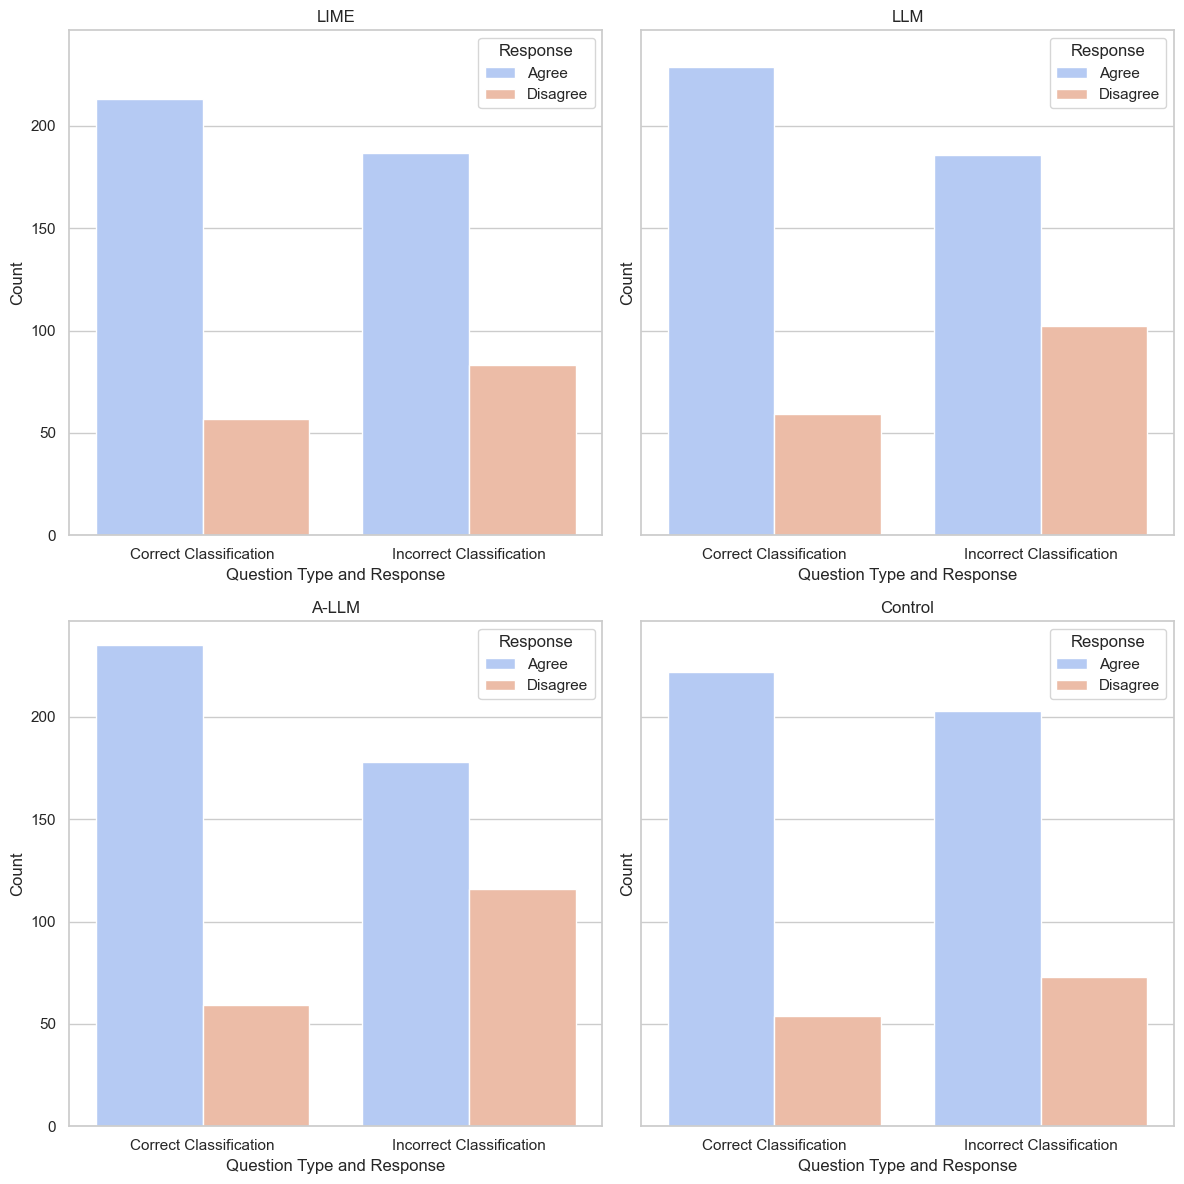

In [99]:
# Unique conditions
conditions = response_counts['Condition'].unique()

cond = ["LIME", "LLM", "A-LLM", "Control"]

# Setting up the plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

axes = axes.flatten()

for ax, condition in zip(axes, conditions):
    # Filtering the data for the current condition
    cond_data = response_counts[response_counts['Condition'] == condition]
    
    # Plotting
    sns.barplot(data=cond_data, x=cond_data['Question Type'], y='Counts',palette='coolwarm', hue='Response', ax=ax)
    ax.set_title(cond[condition-1])
    ax.set_xlabel('Question Type and Response')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x')

plt.tight_layout()
plt.show()

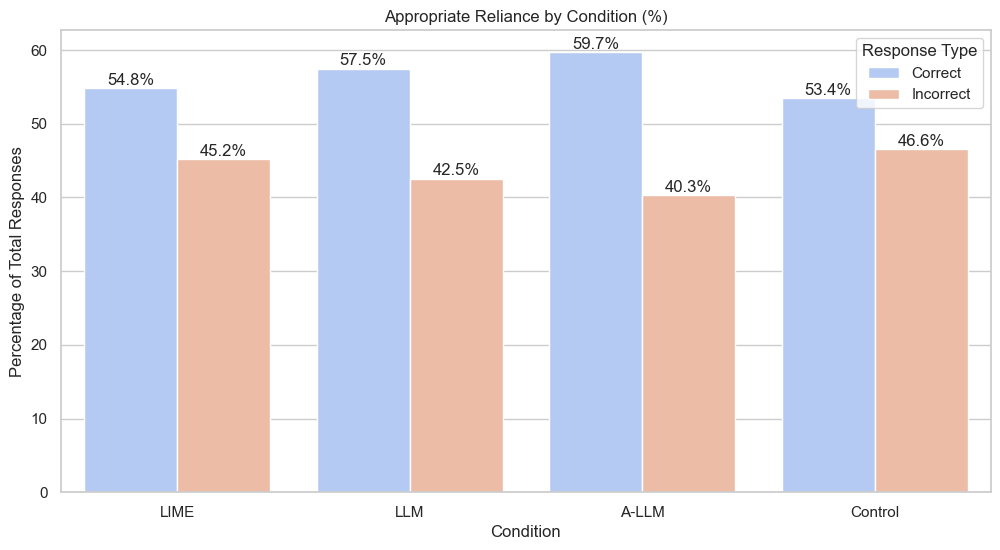

In [100]:
# Define correct and incorrect responses
response_counts['Correct Response'] = ((response_counts['Question Type'] == 'Correct Classification') & (response_counts['Response'] == 'Agree')) | \
                         ((response_counts['Question Type'] == 'Incorrect Classification') & (response_counts['Response'] == 'Disagree'))
response_counts['Incorrect Response'] = ((response_counts['Question Type'] == 'Correct Classification') & (response_counts['Response'] == 'Disagree')) | \
                           ((response_counts['Question Type'] == 'Incorrect Classification') & (response_counts['Response'] == 'Agree'))

# Calculate sums for correct and incorrect by condition
result = response_counts.groupby('Condition').apply(
    lambda x: pd.Series({
        'Correct': (x['Counts'] * x['Correct Response']).sum() / x['Counts'].sum() * 100,
        'Incorrect': (x['Counts'] * x['Incorrect Response']).sum() / x['Counts'].sum() * 100
    })
).reset_index()


# Convert result to long format for seaborn
result_long = result.melt(id_vars='Condition', value_vars=['Correct', 'Incorrect'], var_name='Response Type', value_name='Percentage')

# Step 3: Plot the Results using seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Condition', y='Percentage', hue='Response Type', data=result_long, palette='coolwarm')
ax.set_title('Appropriate Reliance by Condition (%)')
ax.set_xlabel('Condition')
ax.set_ylabel('Percentage of Total Responses')
ax.legend(title='Response Type')
ax.set_xticklabels(['LIME', 'LLM', 'A-LLM', 'Control'])  # Correctly assign labels

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:1.1f}%'.format(height), ha="center")

plt.show()


In [102]:
# Summing correct and incorrect actions for each condition
correct_actions = response_counts[((response_counts['Question Type'] == 'Correct Classification') & (response_counts['Response'] == 'Agree')) | \
                     ((response_counts['Question Type'] == 'Incorrect Classification') & (response_counts['Response'] == 'Disagree'))] \
                     .groupby('Condition')['Counts'].sum()

incorrect_actions = response_counts[((response_counts['Question Type'] == 'Correct Classification') & (response_counts['Response'] == 'Disagree')) | \
                       ((response_counts['Question Type'] == 'Incorrect Classification') & (response_counts['Response'] == 'Agree'))] \
                       .groupby('Condition')['Counts'].sum()

# Create a summary DataFrame with the results
summary_df = pd.DataFrame({
    'Condition': correct_actions.index,
    'Correct Actions': correct_actions.values,
    'Incorrect Actions': incorrect_actions.values
})

# Replace numbers with descriptive names
condition_mapping = {1: 'LIME', 2: 'LLM', 3: 'A-LLM', 4: 'Control'}
summary_df['Condition'] = summary_df['Condition'].replace(condition_mapping)

summary_df



# Summing LLM and A-LLM
nle_data = summary_df[summary_df['Condition'].isin(['LLM', 'A-LLM'])].sum()
nle_data['Condition'] = 'NLE'

# Creating a new DataFrame for the summed data to be compatible with concat
nle_df = pd.DataFrame([nle_data])

# Appending the new row using concat
summary_df = pd.concat([summary_df, nle_df], ignore_index=True)

summary_df

,Condition,Correct Actions,Incorrect Actions
0,LIME,296,244
1,LLM,331,245
2,A-LLM,351,237
3,Control,295,257
4,NLE,682,482


# Statistical Tests

In [105]:
# Filter data for only two conditions, say LIME and LLM
filtered_df = summary_df[summary_df['Condition'].isin(['NLE', 'Control'])]

# Create a contingency table
contingency_table = filtered_df[['Correct Actions', 'Incorrect Actions']].values  # as an array

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p_value}")

Chi-square statistic: 3.8414840018373506, p-value: 0.04999924911783672


In [106]:
# Filter data for only two conditions, say LIME and LLM
filtered_df = summary_df[summary_df['Condition'].isin(['NLE', 'LIME'])]

# Create a contingency table
contingency_table = filtered_df[['Correct Actions', 'Incorrect Actions']].values  # as an array

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p_value}")

Chi-square statistic: 1.999453244542683, p-value: 0.1573559592583286


In [110]:
# Filter data for only two conditions, say LIME and LLM
filtered_df = summary_df[summary_df['Condition'].isin(['A-LLM', 'Control'])]

# Create a contingency table
contingency_table = filtered_df[['Correct Actions', 'Incorrect Actions']].values  # as an array

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p_value}")

Chi-square statistic: 4.280858664536055, p-value: 0.03854387198422333


In [108]:
# Filter data for only two conditions, say LIME and LLM
filtered_df = summary_df[summary_df['Condition'].isin(['LLM', 'Control'])]

# Create a contingency table
contingency_table = filtered_df[['Correct Actions', 'Incorrect Actions']].values  # as an array

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p_value}")

Chi-square statistic: 1.6880307288694907, p-value: 0.19386076597895346


# Analyze control

In [27]:
condition_4= agreement_levels[agreement_levels['Condition'] == 4]

want_columns = [col for col in df.columns if col.startswith('Want')]

# Only Control condition

for col in want_columns:
    condition_4 = condition_4.merge(df[col], left_index=True, right_index=True, how='left')


In [29]:
# Now let's perform the grouping and counting
results = {}
for agree_col in [col for col in condition_4.columns if col.startswith('Agree')]:
    want_col = agree_col.replace('Agree', 'Want')
    if want_col in condition_4.columns:  # Ensure corresponding Want column exists
        grouped_counts = condition_4.groupby(agree_col)[want_col].value_counts().unstack(fill_value=0)
        results[agree_col] = grouped_counts


In [30]:
# Summing up the counts for Agree Yes, Agree No, Disagree Yes, and Disagree No across all data
total_agree_yes = sum(df.loc['Agree', 'Yes'] for df in results.values())
total_agree_no = sum(df.loc['Agree', 'No'] for df in results.values())
total_disagree_yes = sum(df.loc['Disagree', 'Yes'] for df in results.values())
total_disagree_no = sum(df.loc['Disagree', 'No'] for df in results.values())

print("Argree, want explanation: ", total_agree_yes)
print("Argree, don't want explanation: ", total_agree_no)
print(' ')
print("Disagree, want explanation: ", total_disagree_yes)
print("Disagree, don't want explanation: ", total_disagree_no)
print(' ')
print("Total, want explanation: ", total_agree_yes + total_disagree_yes)
print("Total, Don't want explanation: ", total_agree_no + total_disagree_no)



Argree, want explanation:  138
Argree, don't want explanation:  287
 
Disagree, want explanation:  72
Disagree, don't want explanation:  55
 
Total, want explanation:  210
Total, Don't want explanation:  342


In [31]:
# Data for creating the DataFrame
data = {
    'Want': ['Want', 'Want', 'Not Want', 'Not Want'],
    'Response': ['Agree', 'Disagree', 'Agree', 'Disagree'],
    'Counts': [total_agree_yes, total_disagree_yes, total_agree_no, total_disagree_no]  # Make sure to update these counts with the actual values
}

# Create the DataFrame
response_df = pd.DataFrame(data)

# Display the DataFrame
response_df

,Want,Response,Counts
0,Want,Agree,138
1,Want,Disagree,72
2,Not Want,Agree,287
3,Not Want,Disagree,55


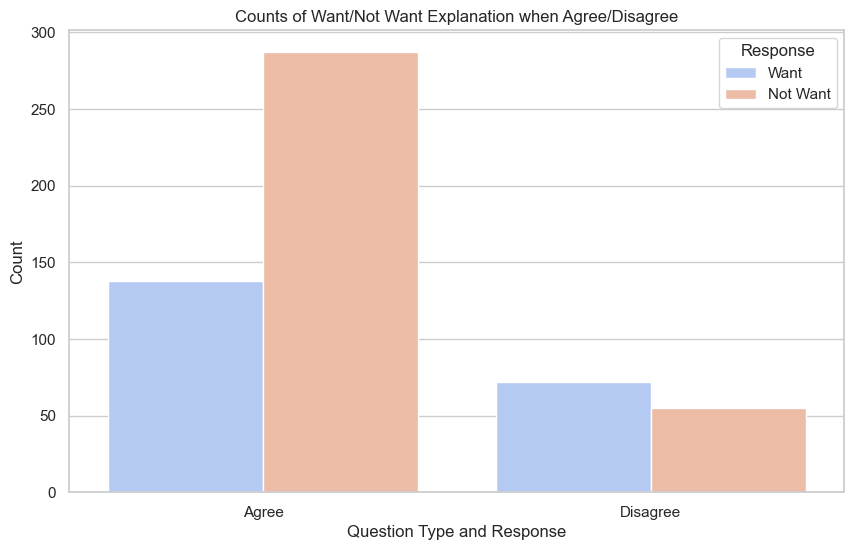

In [32]:
# Use seaborn to plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='Counts', hue='Want', data=response_df, palette='coolwarm', errorbar=None)

plt.title('Counts of Want/Not Want Explanation by Agree/Disagree')
plt.xlabel('Question Type and Response')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

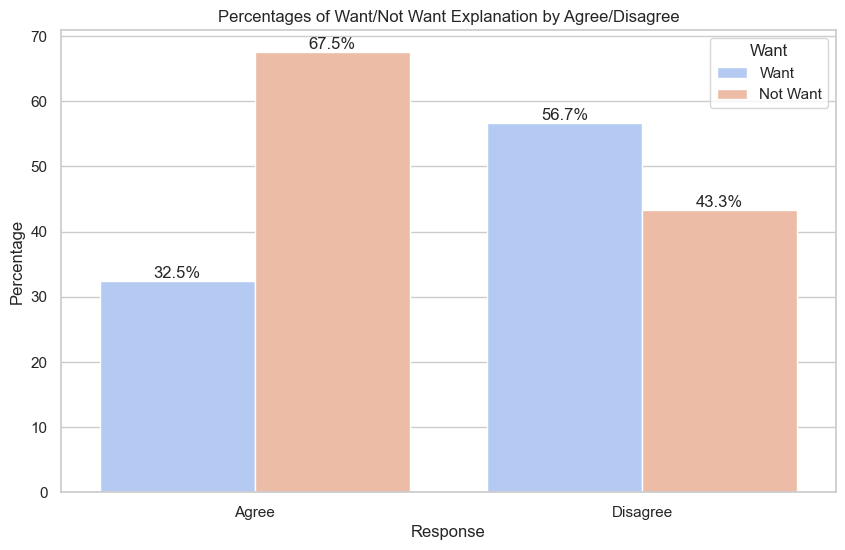

In [72]:
# Calculate the total counts by response
response_df['Total'] = response_df.groupby('Response')['Counts'].transform('sum')
# Calculate percentages instead of proportions
response_df['Percentage'] = (response_df['Counts'] / response_df['Total']) * 100

# Use seaborn to plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Response', y='Percentage', hue='Want', data=response_df, palette='coolwarm', errorbar=None)

plt.title('Percentages of Want/Not Want Explanation by Agree/Disagree')
plt.xlabel('Response')
plt.ylabel('Percentage')
plt.legend(title='Want')

# Add percentage labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:1.1f}%'.format(height), ha="center")

plt.show()